## IMDB reviews classifier

### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Data overview

In [3]:
data = pd.read_csv('data/IMDB Dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
data['sentiment'] = data['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)
data.sentiment.value_counts()

sentiment
1    25000
0    25000
Name: count, dtype: int64

### Using spaCy to preprocess to the text

In [5]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

nlp = spacy.load("en_core_web_sm")
stopwords = list(STOP_WORDS)

In [8]:
def preprocessing(txt):
    doc = nlp(txt)
    tokens = [token.lemma_ for token in doc if not token.is_punct and not token.is_space and str(token) not in stopwords]
    return " ".join(tokens)

data['review'] = data['review'].apply(preprocessing)

### Vectorizing the text, creating a model

In [15]:
from sklearn.model_selection import train_test_split

X, y = data['review'], data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_vectors, y_train)

### Model evaluation

In [23]:
y_pred = model.predict(X_test_vectors)
print(f'Accuracy: {accuracy_score(y_test, y_pred)*100}%')

Accuracy: 84.95%


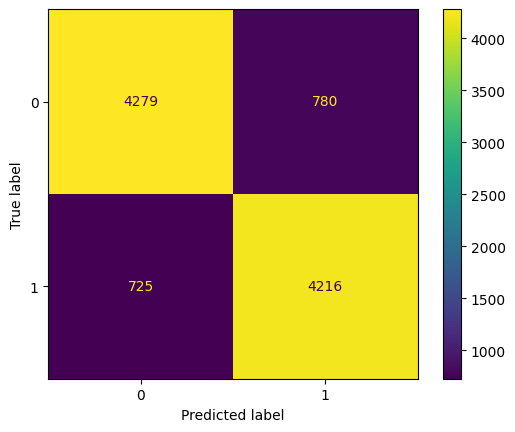

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

### Conclusion
- In this task, I used spacy to get the tokens' lemmas, and clean them from stopwords, punctuations and spaces. Then I used Random Forest Classifier to predict labels.
- As we can see, the default model without special hyperparameter, tuning performs well with an accuracy of 84.9%.